# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2023-03-03 19:47:00--  https://raw.githubusercontent.com/girafe-ai/ml-course/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: 'car_data.csv'

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.03s   

2023-03-03 19:47:01 (2.10 MB/s) - 'car_data.csv' saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)
#print (pd.DataFrame(y_train))
# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,564,98,35,70,182,68,5,155,41,19,124,184,371,117,71,3,22,202,205
1,544,88,43,70,177,74,19,152,44,19,143,180,342,168,76,1,9,186,189
2,339,87,41,73,158,64,7,151,44,19,138,175,341,152,73,3,8,190,194
3,785,85,43,66,123,56,6,148,46,19,145,166,319,171,85,6,11,179,182
4,793,98,46,88,191,63,6,192,34,22,147,215,563,174,73,2,26,194,197
5,680,95,46,76,162,66,11,162,42,20,155,175,381,172,74,8,4,184,193
6,109,99,48,79,199,68,6,185,35,22,153,202,524,171,74,5,8,195,195
7,224,86,41,66,133,56,6,136,49,18,136,155,274,162,74,5,14,183,189
8,428,112,50,104,197,58,11,208,32,24,159,223,639,186,67,15,22,191,202
9,61,77,38,63,135,59,5,130,52,18,130,145,247,139,79,13,21,183,187


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,428.575592,93.617486,44.652095,81.346084,166.954463,61.366120,8.353370,167.690346,41.264117,20.502732,147.546448,187.114754,434.185792,173.402550,72.502732,6.497268,12.744991,188.867031,195.462659
std,240.666297,8.375284,6.180755,15.778476,32.130490,6.799448,3.881325,33.442001,7.918921,2.595352,14.636600,31.139074,176.902841,32.531962,7.208982,4.887278,9.064680,6.200320,7.491173
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,222.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.000000,315.000000,148.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,437.000000,92.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,361.000000,172.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,635.000000,100.000000,49.000000,96.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,215.000000,578.000000,196.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,252.000000,126.000000,52.000000,262.000000,61.000000,28.000000,188.000000,288.000000,987.000000,268.000000,127.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations :

Нам нужно отнормировать значения, тк они отличаются на порядки и будут вносить разный вклад в приоритет признаков

In [6]:
### YOUR CODE HERE
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.563219,0.523745,-1.563061,-0.719742,0.468691,0.976539,-0.864763,-0.379819,-0.033383,-0.579537,-1.610205,-0.100118,-0.357504,-1.735339,-0.208643,-0.716239,1.021928,2.120043,1.274305
1,0.480041,-0.671334,-0.267540,-0.719742,0.312933,1.859769,2.745542,-0.469609,0.345802,-0.579537,-0.310905,-0.228692,-0.521585,-0.166220,0.485569,-1.125838,-0.413518,-0.462822,-0.863490
2,-0.372538,-0.790841,-0.591421,-0.529436,-0.278945,0.387720,-0.349006,-0.499539,0.345802,-0.579537,-0.652826,-0.389408,-0.527243,-0.658493,0.069042,-0.716239,-0.523937,0.182894,-0.195429
3,1.482341,-1.029857,-0.267540,-0.973483,-1.369246,-0.789919,-0.606885,-0.589328,0.598592,-0.579537,-0.174137,-0.678697,-0.651718,-0.073919,1.735150,-0.101840,-0.192680,-1.592826,-1.798775
4,1.515612,0.523745,0.218280,0.422093,0.749054,0.240515,-0.606885,0.727583,-0.918148,0.577430,-0.037368,0.896323,0.728828,0.018382,0.069042,-0.921038,1.463603,0.828611,0.205407
5,1.045654,0.165221,0.218280,-0.339130,-0.154339,0.682130,0.682510,-0.170311,0.093012,-0.193882,0.509705,-0.389408,-0.300924,-0.043152,0.207884,0.307759,-0.965612,-0.785680,-0.329041
6,-1.329089,0.643252,0.542160,-0.148824,0.998266,0.976539,-0.606885,0.518074,-0.791753,0.577430,0.372937,0.478461,0.508167,-0.073919,0.207884,-0.306640,-0.523937,0.990040,-0.061817
7,-0.850814,-0.910349,-0.591421,-0.973483,-1.057731,-0.789919,-0.606885,-0.948485,0.977777,-0.965193,-0.789594,-1.032274,-0.906327,-0.350823,0.207884,-0.306640,0.138577,-0.947109,-0.863490
8,-0.002394,2.196854,0.866040,1.437057,0.935963,-0.495509,0.682510,1.206459,-1.170938,1.348741,0.783242,1.153470,1.158834,0.387586,-0.764012,1.741355,1.021928,0.344323,0.873468
9,-1.528718,-1.985920,-1.077241,-1.163789,-0.995428,-0.348304,-0.864763,-1.128064,1.356962,-0.965193,-1.199900,-1.353706,-1.059093,-1.058464,0.902096,1.331756,0.911509,-0.947109,-1.130714


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

 f1 score :  0.7548463918189865
 accuracy score :  0.7441077441077442
 optimal parameter :  {'C': 7.800000000000001}


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

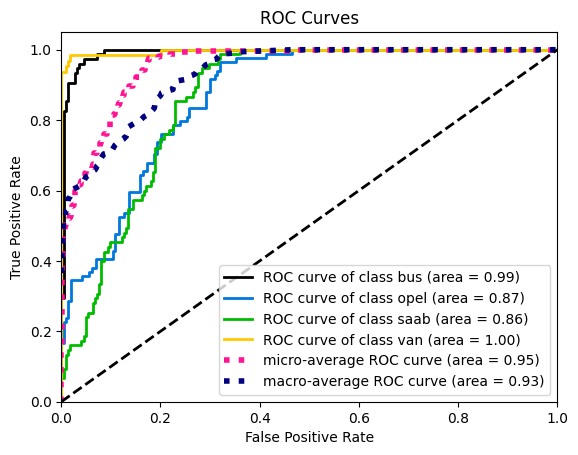

In [8]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_roc

regression = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500)
model = GridSearchCV(regression, param_grid= {'C':np.linspace(0.1, 10, 10)})
trained_model = model.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)

print (" f1 score : ", f1_score(y_test, y_pred, average = 'macro'))
print (" accuracy score : ", accuracy_score(y_test, y_pred))
print (" optimal parameter : ", trained_model.best_params_)
plot_roc(y_test, trained_model.predict_proba(X_test))


In [9]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

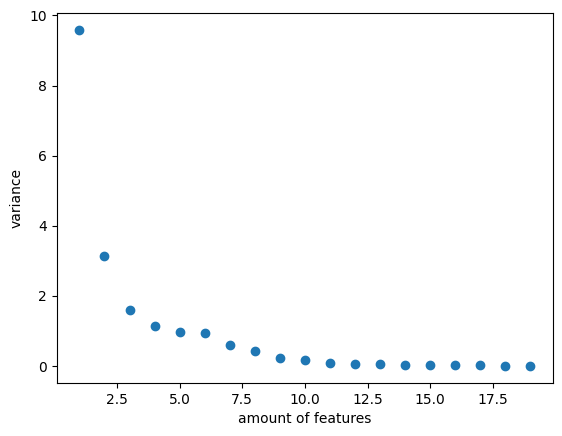

In [10]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA()
pca.fit(X_train)
number_of_features = np.linspace(1, 19, 19)
plt.xlabel("amount of features")
plt.ylabel("variance")
plt.plot(number_of_features, pca.explained_variance_ , 'o')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

Выберем 12 признаков, тк после 12 у нас вариация стремиться к 0. Тк порядки могут сильно отличаться нам нужно было нормализовать, что мы и сделали

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [11]:
### YOUR CODE HERE
pca = PCA(n_components = 12)


pca.fit(X_train)
pca.fit(X_test)


X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)


trained_model = model.fit(X_train_reduced, y_train)
y_pred = trained_model.predict(X_test_reduced)

print (" f1 score : ", f1_score(y_test, y_pred, average = 'macro'))
print (" accuracy score : ", accuracy_score(y_test, y_pred))

 f1 score :  0.7257148185990691
 accuracy score :  0.7171717171717171


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

f1_score =  0.7201577028084847
accuracy =  0.7104377104377104


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

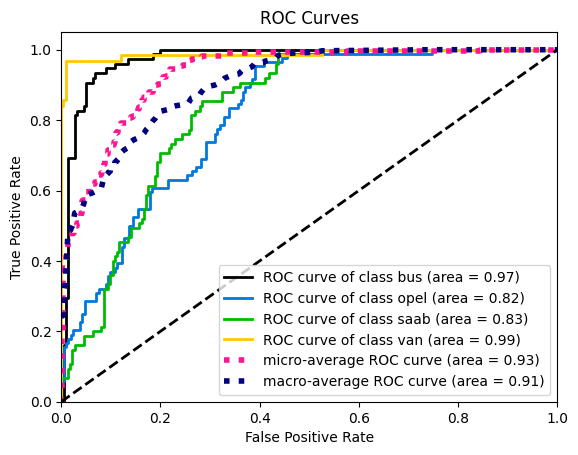

In [12]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline

pipe = Pipeline([('reduce_dim', PCA(n_components=12)), 
    ('model', GridSearchCV(LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500), 
                    param_grid={'C': np.linspace(0.1, 10, 10)}))])


pipe.fit(X_train_reduced, y_train)
y_pred = pipe.predict(X_test_reduced)

print("f1_score = ", f1_score(y_test, y_pred, average='macro'))
print("accuracy = ", accuracy_score(y_test, y_pred))
plot_roc(y_test, pipe.predict_proba(X_test_reduced))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

 f1 score :  0.7067829434479674
 accuracy score :  0.6902356902356902
 optimal parameter :  {'max_depth': 34}


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

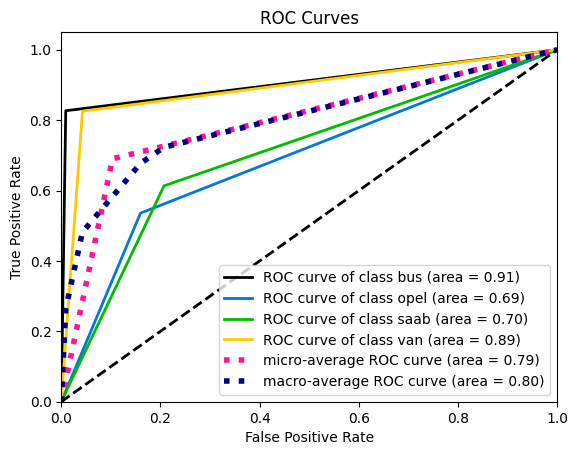

In [13]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
tree = DecisionTreeClassifier()
model = GridSearchCV(tree, param_grid = {'max_depth': np.arange(2, 250, 2)})
trained_model = model.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)

print (" f1 score : ", f1_score(y_test, y_pred, average = 'macro'))
print (" accuracy score : ", accuracy_score(y_test, y_pred))
print (" optimal parameter : ", trained_model.best_params_)
plot_roc(y_test, trained_model.predict_proba(X_test))


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [15]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier
import numpy as np

#lets start with logregression

    # !!! Note : it works with warnings, but works !!!
f1_array = []
accuracy_array = []
regression = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500)
for i in range(2, 100, 5):
    model = BaggingClassifier(regression, i, max_samples=1.0, max_features=1.0)
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    f1_array.append(f1_score(y_test, y_pred, average='macro'))
    accuracy_array.append(accuracy_score(y_test, y_pred))


In [16]:
print ("logregression f1 array \n")
print (np.array(f1_array))
print ("mean : ", np.mean(np.array(f1_array)), "\n")
print ("logregression accuracy array \n")
print (np.array(accuracy_array))
print ("mean : ", np.mean(np.array(accuracy_array)), "\n")

logregression f1 array 

[0.75629644 0.73741999 0.73042589 0.73112017 0.73242894 0.7357039
 0.73572665 0.7393097  0.72928078 0.73302555 0.72503288 0.73617597
 0.73287344 0.7393097  0.73287344 0.73329863 0.72661227 0.7393097
 0.7323425  0.7393097 ]
mean :  0.7348938120518226 

logregression accuracy array 

[0.74747475 0.72727273 0.72053872 0.72053872 0.72390572 0.72727273
 0.72727273 0.73063973 0.72053872 0.72390572 0.71717172 0.72727273
 0.72390572 0.73063973 0.72390572 0.72390572 0.71717172 0.73063973
 0.72390572 0.73063973]
mean :  0.7259259259259258 



/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


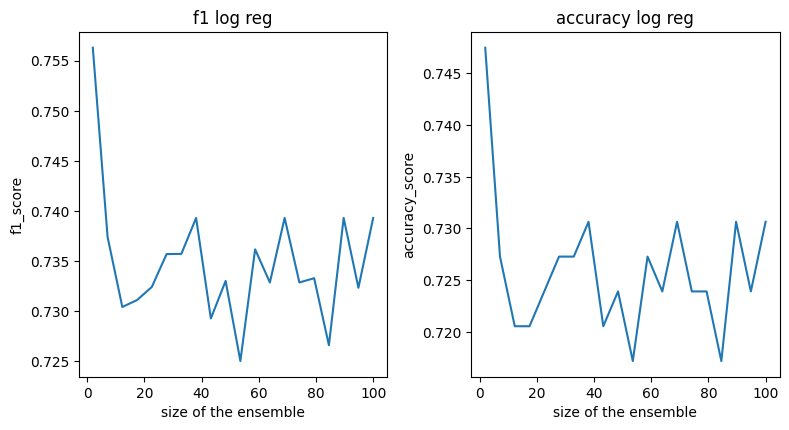

In [17]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
t = np.linspace(2, 100, 20)
plt.subplot(2, 2, 1)
plt.title("f1 log reg")
plt.xlabel("size of the ensemble")
plt.ylabel("f1_score")
plt.plot(t, f1_array)
plt.subplot(2, 2, 2)
plt.title("accuracy log reg")
plt.xlabel("size of the ensemble")
plt.ylabel("accuracy_score")
plt.plot(t, accuracy_array)
plt.show()

In [18]:
#and now lets count DecisionTree
f1_array = []
accuracy_array = []
tree = DecisionTreeClassifier()
for i in range(2, 100, 5):
    model = BaggingClassifier(tree, i, max_samples=1.0, max_features=1.0)
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    f1_array.append(f1_score(y_test, y_pred, average='macro'))
    accuracy_array.append(accuracy_score(y_test, y_pred))
    

In [19]:
print ("DecisionTree f1 array \n")
print (np.array(f1_array))
print ("mean : ", np.mean(np.array(f1_array)), "\n")
print ("DecisionTree accuracy array \n")
print (np.array(accuracy_array))
print ("mean : ", np.mean(np.array(accuracy_array)), "\n")

DecisionTree f1 array 

[0.65346922 0.7167523  0.70579254 0.71713255 0.69252699 0.69322791
 0.69368974 0.69971805 0.71991644 0.71312258 0.71195907 0.69555928
 0.7220399  0.69994005 0.72535435 0.69723362 0.71998997 0.71842314
 0.70437333 0.7157752 ]
mean :  0.7057998114252882 

DecisionTree accuracy array 

[0.65319865 0.71043771 0.7003367  0.71043771 0.68350168 0.68350168
 0.69023569 0.69360269 0.71380471 0.70707071 0.7037037  0.69023569
 0.71380471 0.69023569 0.71717172 0.69023569 0.71380471 0.71380471
 0.6969697  0.71043771]
mean :  0.6993265993265995 



/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


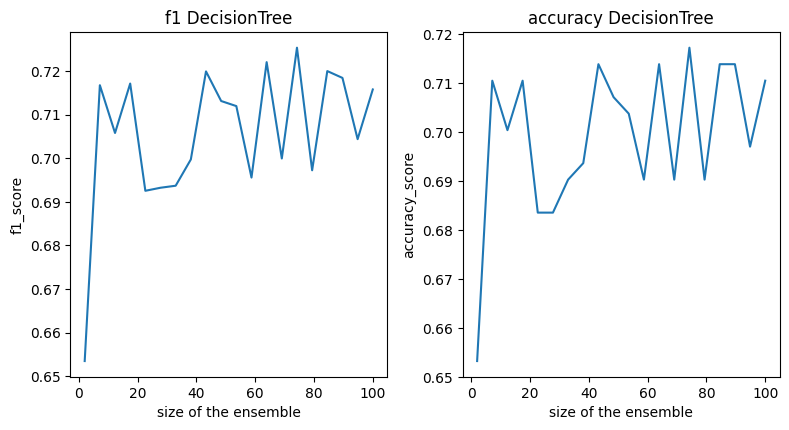

In [20]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
t = np.linspace(2, 100, 20)
plt.subplot(2, 2, 1)
plt.title("f1 DecisionTree")
plt.xlabel("size of the ensemble")
plt.ylabel("f1_score")
plt.plot(t, f1_array)
plt.subplot(2, 2, 2)
plt.title("accuracy DecisionTree")
plt.xlabel("size of the ensemble")
plt.ylabel("accuracy_score")
plt.plot(t, accuracy_array)
plt.show()

Благодаря графикам мы видим, что лучшая точность достигается для логистической регрессии, если размер ансамбля равен примерно 20, а для деревьев примерно 25-30

Про поводу гиперпараметра для деревьев из пункта 2.5, кажется , что он не особо подходят к ансамблю, тк у нас много моделей и гиперпараметр должен заново подбираться  

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
f1_array = []
accuracy_array = []
for i in range(2, 100, 5):
    model = RandomForestClassifier(n_estimators=i)
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    f1_array.append(f1_score(y_test, y_pred, average='macro'))
    accuracy_array.append(accuracy_score(y_test, y_pred))

In [22]:
print ("RandomForest f1 array \n")
print (np.array(f1_array))
print ("mean : ", np.mean(np.array(f1_array)), "\n")
print ("RandomForest accuracy array \n")
print (np.array(accuracy_array))
print ("mean : ", np.mean(np.array(accuracy_array)), "\n")

RandomForest f1 array 

[0.61258745 0.69185651 0.71171335 0.71740475 0.71687891 0.75117121
 0.71644122 0.73920956 0.72326912 0.73688769 0.74733199 0.7183923
 0.72718673 0.74221845 0.7296408  0.72122148 0.72738121 0.73466838
 0.73159058 0.74212649]
mean :  0.7219589096100856 

RandomForest accuracy array 

[0.61952862 0.68686869 0.7037037  0.71380471 0.71380471 0.74410774
 0.71043771 0.73400673 0.71717172 0.73063973 0.74410774 0.71380471
 0.72053872 0.73737374 0.72390572 0.71380471 0.72390572 0.72727273
 0.72727273 0.73737374]
mean :  0.717171717171717 



/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


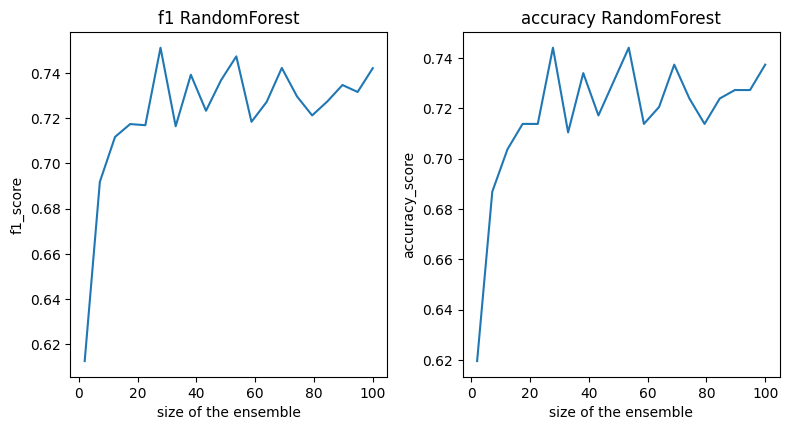

In [23]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
t = np.linspace(2, 100, 20)
plt.subplot(2, 2, 1)
plt.title("f1 RandomForest")
plt.xlabel("size of the ensemble")
plt.ylabel("f1_score")
plt.plot(t, f1_array)
plt.subplot(2, 2, 2)
plt.title("accuracy RandomForest")
plt.xlabel("size of the ensemble")
plt.ylabel("accuracy_score")
plt.plot(t, accuracy_array)
plt.show()

Получили, что оптимальный размер ансамбля - это от 15 до 50, можем сказать, что результат совпадает с 2.6, наверное из-за того, что подходы очень схожи

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [24]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

regression = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=3.4)
tree = DecisionTreeClassifier(max_depth = 184, random_state=0)
forest = RandomForestClassifier(n_estimators = 35, random_state=0)

f1_array = []
accuracy_array = []
dataset_size = []
batch = y_train.shape[0] // 10
for i in range(1, 11, 1):
    
    current_dataset_X_train = X_train[:batch*i,:]
    current_dataset_y_train = y_train[:batch*i]
    regression_model = regression.fit(current_dataset_X_train, current_dataset_y_train)
    tree_model = tree.fit(current_dataset_X_train, current_dataset_y_train)
    forest_model = forest.fit(current_dataset_X_train, current_dataset_y_train)
    dataset_size.append(i*batch)
    
    y_pred_reg = regression_model.predict(X_test)
    y_pred_tree = tree_model.predict(X_test)
    y_pred_forest = forest_model.predict(X_test)
    
    f1_reg = f1_score(y_test, y_pred_reg, average='macro')
    acc_reg = accuracy_score(y_test, y_pred_reg)

    
    f1_tree = f1_score(y_test, y_pred_tree, average='macro')
    acc_tree = accuracy_score(y_test, y_pred_tree)

    f1_forest = f1_score(y_test, y_pred_forest, average='macro')
    acc_forest = accuracy_score(y_test, y_pred_forest)
    
    f1_array.append([f1_reg, f1_tree, f1_forest])
    accuracy_array.append([acc_reg, acc_tree, acc_forest])


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


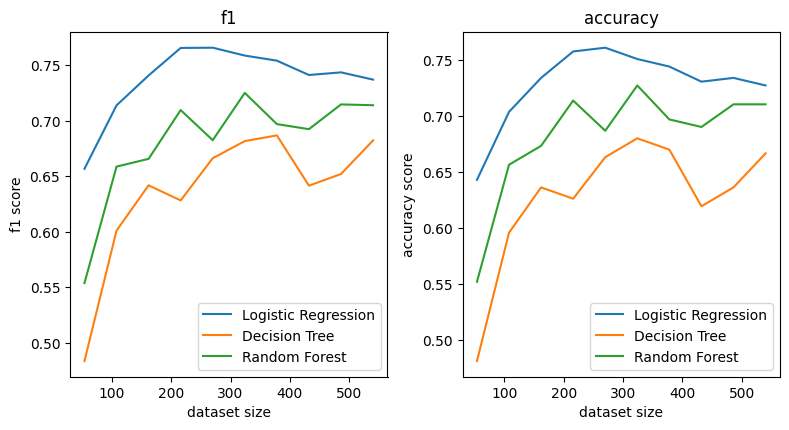

In [25]:
#make plots
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
plt.subplot(2, 2, 1)
plt.title("f1")
plt.xlabel("dataset size")
plt.ylabel("f1 score")
plt.plot(dataset_size, f1_array)
plt.legend(['Logistic Regression', 'Decision Tree', 'Random Forest'])
plt.subplot(2, 2, 2)
plt.title("accuracy")
plt.xlabel("dataset size")
plt.ylabel("accuracy score")
plt.plot(dataset_size, accuracy_array)
plt.legend(['Logistic Regression', 'Decision Tree', 'Random Forest'])

Как видно из графиков, лучшее качество модели достигается на датасете из примерно 250 строчек, происходит это скорее всего из-за того, что появляется переобучение и качество предсказаний падает на тестовых данных